In [ ]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datasets (reemplaza 'ruta_del_archivo' con la ubicación correcta)
df_mexico = pd.read_csv("mexico_bueno_sin_nulos1.csv")
df_mexico.head(5)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        id  \
0             0             0           0   35797.0   
1             1             1           1   44616.0   
2             2             2           2   67703.0   
3             3             3           3   70644.0   
4             4             4           4  107078.0   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2                 2 bedroom apt. deco bldg, Condesa   
3  Beautiful light Studio Coyoacan- full equipped !   
4                                NEW  DESIGNER LOFT   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                               neighborhood_overview  host_id host_name  \
0  Santa Fe Mall, Interloma Park and the Lion Des...   153786      Dici   
1                                      No disponible   196253  Fernando   
2                                      No disponible   334451  Nicholas   
3  Coyoacan is a beautiful neighborhood famous fo...   212109    Trisha   
4  Is located in the best area of Mexico City, Po...   540705    Andrea   

   host_since  ... reviews_per_month host_neighbourhood  \
0  28/06/2010  ...              1.74                NaN   
1  09/08/2010  ...              0.41            Condesa   
2  04/01/2011  ...              0.31          Hipódromo   
3  24/08/2010  ...              0.83           Coyoacán   
4  27/04/2011  ...              0.11           Coyoacán   

  neighbourhood_cleansed           source  host_response_time  \
0  Cuajimalpa de Morelos      city scrape  within a few hours   
1             Cuauhtémoc      city scrape      within an hour   
2             Cuauhtémoc      city scrape  within a few hours   
3               Coyoacán      city scrape      within an hour   
4               Coyoacán  previous scrape  within a few hours   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1  ['email', 'phone', 'work_email']                    t   
2                ['email', 'phone']                    t   
3  ['email', 'phone', 'work_email']                    t   
4                         ['phone']                    t   

  host_identity_verified instant_bookable  host_is_superhost  
0                      t                f                  f  
1                      t                f                  t  
2                      t                f                  t  
3                      t                f                  t  
4                      f                f                  t  

[5 rows x 57 columns]

In [3]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.2                 26582 non-null  int64  
 1   Unnamed: 0.1                 26582 non-null  int64  
 2   Unnamed: 0                   26582 non-null  int64  
 3   id                           26582 non-null  float64
 4   name                         26582 non-null  object 
 5   description                  26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   host_id                      26582 non-null  int64  
 8   host_name                    26582 non-null  object 
 9   host_since                   26582 non-null  object 
 10  host_location                26582 non-null  object 
 11  host_response_rate           26582 non-null  object 
 12  host_acceptance_rate         26582 non-null  object 
 13  neighbourhood   

In [4]:
df_mexico.isnull().sum()

Unnamed: 0.2                   0
Unnamed: 0.1                   0
Unnamed: 0                     0
id                             0
name                           0
description                    0
neighborhood_overview          0
host_id                        0
host_name                      0
host_since                     0
host_location                  0
host_response_rate             0
host_acceptance_rate           0
neighbourhood                  0
property_type                  0
room_type                      0
bathrooms_text                 0
amenities                      0
price                          0
latitude                       0
longitude                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
maximum_nights                 0
minimum_minimum_nights         0
maximum_minimum_nights         0
minimum_maximum_nights         0
maximum_ma

In [5]:
df_mexico.to_csv("mexico_bueno_sin_nulos1.csv")

In [6]:
df_mexico['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [7]:
#Filtrar los datos por cada tipo de habitación
mexico_entire_home = df_mexico[df_mexico['room_type'] == 'Entire home/apt']
mexico_private_room = df_mexico[df_mexico['room_type'] == 'Private room']
mexico_shared_room = df_mexico[df_mexico['room_type'] == 'Shared room']
mexico_hotel_room = df_mexico[df_mexico['room_type'] == 'Hotel room']

In [13]:
# Verificamos el tamaño de cada DataFrame
len(mexico_entire_home), len(mexico_private_room), len(mexico_shared_room), len(mexico_hotel_room)

(17363, 8693, 401, 125)

In [9]:
# Guardar los DataFrames en archivos CSV
mexico_entire_home.to_csv("mexico_entire_home.csv", index=False)
mexico_private_room.to_csv("mexico_private_room.csv", index=False)
mexico_shared_room.to_csv("mexico_shared_room.csv", index=False)
mexico_hotel_room.to_csv("mexico_hotel_room.csv", index=False)


mexico_entire_home 
price Vs host_acceptance_rate

In [10]:
# Cargar archivos CSV de México
mexico_entire_home = pd.read_csv("mexico_entire_home.csv")

In [11]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_entire_home[['host_acceptance_rate']]
Vars_Dep=mexico_entire_home['price']

In [14]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

ValueError: could not convert string to float: '93%'

<Axes: xlabel='accommodates', ylabel='price'>

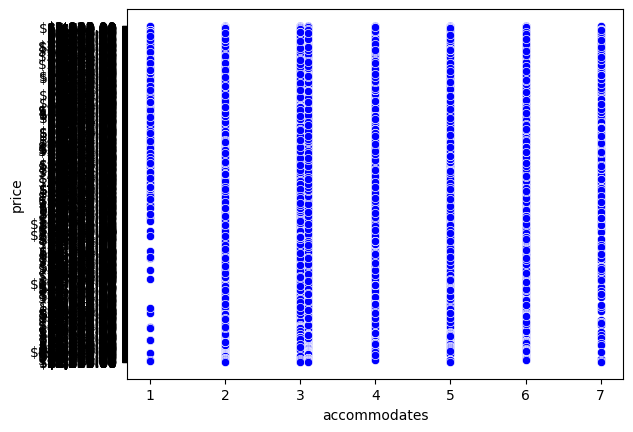

In [13]:
sns.scatterplot(x='accommodates', y='price', color="blue", data=mexico_entire_home)


In [24]:

# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
mexico_entire_home.head()

Predicciones  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0        id  \
0   1537.993341             0             0           0   35797.0   
1   1723.321870             1             1           1   44616.0   
2   1874.954303             2             2           2   67703.0   
3   1537.993341             3             3           3   70644.0   
4   1537.993341             4             4           4  107078.0   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2                 2 bedroom apt. deco bldg, Condesa   
3  Beautiful light Studio Coyoacan- full equipped !   
4                                NEW  DESIGNER LOFT   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                               neighborhood_overview  host_id host_name  ...  \
0  Santa Fe Mall, Interloma Park and the Lion Des...   153786      Dici  ...   
1                                      No disponible   196253  Fernando  ...   
2                                      No disponible   334451  Nicholas  ...   
3  Coyoacan is a beautiful neighborhood famous fo...   212109    Trisha  ...   
4  Is located in the best area of Mexico City, Po...   540705    Andrea  ...   

  review_scores_value reviews_per_month host_neighbourhood  \
0                4.48              1.74                NaN   
1                4.48              0.41            Condesa   
2                4.91              0.31          Hipódromo   
3                4.92              0.83           Coyoacán   
4                4.82              0.11           Coyoacán   

  neighbourhood_cleansed           source  host_response_time  \
0  Cuajimalpa de Morelos      city scrape  within a few hours   
1             Cuauhtémoc      city scrape      within an hour   
2             Cuauhtémoc      city scrape  within a few hours   
3               Coyoacán      city scrape      within an hour   
4               Coyoacán  previous scrape  within a few hours   

                 host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'work_email']                    t   
1  ['email', 'phone', 'work_email']                    t   
2                ['email', 'phone']                    t   
3  ['email', 'phone', 'work_email']                    t   
4                         ['phone']                    t   

  host_identity_verified  instant_bookable  
0                      t                 f  
1                      t                 f  
2                      t                 f  
3                      t                 f  
4                      f                 f  

[5 rows x 57 columns]

México - Entire Home
Coeficiente de Determinación (R²): 0.0022914127985013133
Coeficiente de Correlación: 0.04786870374786969


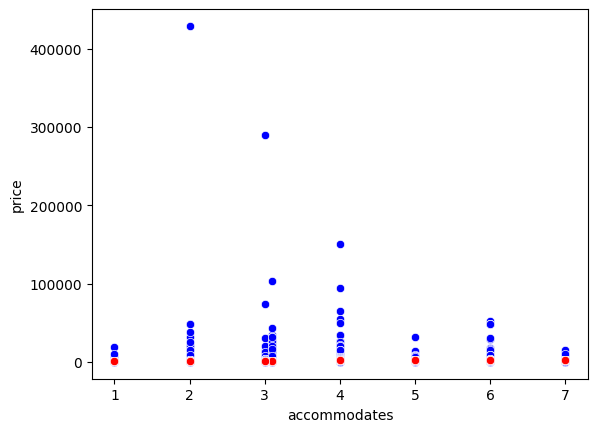

In [22]:
Vars_Indep = mexico_entire_home[['accommodates']]
Vars_Dep = mexico_entire_home['price']

model = LinearRegression()
model.fit(X=Vars_Indep, y=Vars_Dep)

y_pred = model.predict(X=Vars_Indep)
mexico_entire_home.insert(0, 'Predicciones', y_pred)

sns.scatterplot(x='accommodates', y='price', color="blue", data=mexico_entire_home)
sns.scatterplot(x='accommodates', y='Predicciones', color="red", data=mexico_entire_home)

coef_Deter = model.score(X=Vars_Indep, y=Vars_Dep)
coef_Correl = np.sqrt(coef_Deter)

print("México - Entire Home")
print("Coeficiente de Determinación (R²):", coef_Deter)
print("Coeficiente de Correlación:", coef_Correl)
